## Text-to-Image Generation using Stable Diffusion and Diffusers

In this notebook we shall learn

* how to generate images using text prompts
* the various diffusion pipelines for tasks such as text-to-image, image-to-image, text-to-music
* primary components of the diffusion pipeline: UNet model and schedulers

Diffusers library (HuggingFace): enables using SoTA diffusion models for generating images, audio, 3D structures of molecules

* Diffusion Pipeline wraps the complexity of the entire diffusion system into easy to use API

In [ ]:
#diffusers is a hugging face page for using diffusion models from huggingface hub
!pip install diffusers transformers gradio accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 295.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/13

In [ ]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
!pip show torch

Name: torch
Version: 2.4.0+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, fastai, torchaudio, torchvision


In [ ]:
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)
pipe = pipe.to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/807 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/901 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
prompt = """Generate a flat, vibrant illustration capturing a key moment from a Adventurous story set in Jungle, Adventure. The scene features the following characters: Simba is characterized by Fun, Goofy, Adventurous. They have the habit of To play with other wild animals and desire To become Lion king. They are related to others as follows: Son of Mufasa. Mufasa is characterized by Loyal, Old, Calm. They have the habit of To eat other animals for food and desire To make his son the king of the jungle. They are related to others as follows: Father of Simba.. Focus on depicting the essence of their traits, interactions, and desires in a single frame. The illustration should be clear and minimalistic, using clean lines and a cohesive style to convey the tone of the story. Include visual elements that reflect the ambiance of the setting, with appropriate lighting and color schemes to match the Adventurous nature of the narrative. Make sure the image is detailed, visually cohesive, and suitable for use in a video adaptation of the story, with a modern and engaging artistic style."""

In [ ]:
image = pipe(prompt).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (221 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ized by loyal, old, calm. they have the habit of to eat other animals for food and desire to make his son the king of the jungle. they are related to others as follows : father of simba.. focus on depicting the essence of their traits, interactions, and desires in a single frame. the illustration should be clear and minimalistic, using clean lines and a cohesive style to convey the tone of the story. include visual elements that reflect the ambiance of the setting, with appropriate lighting and color schemes to match the adventurous nature of the narrative. make sure the image is detailed, visually cohesive, and suitable for use in a video adaptation of the story, with a modern and engaging artistic style

  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  Generate a flat, vibrant illustration capturing a key moment from a Adventurous story set in Jungle, Adventure. The scene features the following characters: Simba is characterized by Fun, Goofy, Adventurous. They have the habit of To play with other wild animals and desire To become Lion king. They are related to others as follows: Son of Mufasa. Mufasa is characterized by Loyal, Old, Calm. They have the habit of To eat other animals for food and desire To make his son the king of the jungle. They are related to others as follows: Father of Simba.. Focus on depicting the essence of their traits, interactions, and desires in a single frame. The illustration should be clear and minimalistic, using clean lines and a cohesive style to convey the tone of the story. Include visual elements that reflect the ambiance of the setting, with appropriate lighting and color schemes to match the Adventurous nature of the narrative. Make sure the image is detailed, visually cohesive, and su

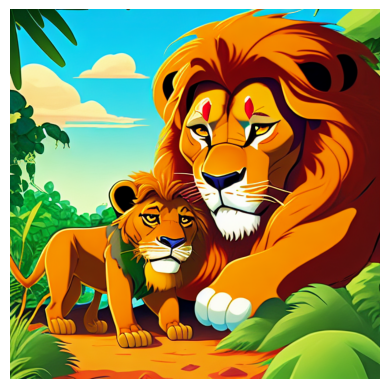

In [ ]:
print("[PROMPT]: ",prompt)
plt.imshow(image);
plt.axis('off');

In [ ]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ized by loyal, old, calm. they have the habit of to eat other animals for food and desire to make his son the king of the jungle. they are related to others as follows : father of simba.. focus on depicting the essence of their traits, interactions, and desires in a single frame. the illustration should be clear and minimalistic, using clean lines and a cohesive style to convey the tone of the story. include visual elements that reflect the ambiance of the setting, with appropriate lighting and color schemes to match the adventurous nature of the narrative. make sure the image is detailed, visually cohesive, and suitable for use in a video adaptation of the story, with a modern and engaging artistic style.']


  0%|          | 0/100 [00:00<?, ?it/s]

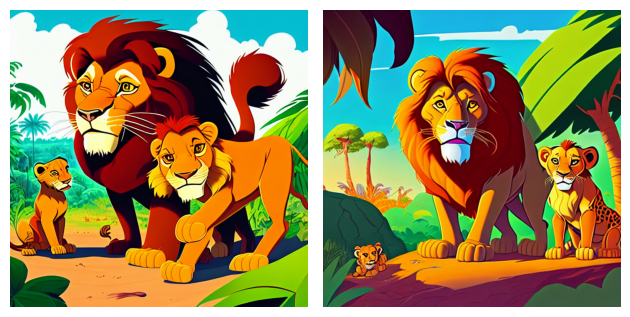

In [ ]:
#num_images_per_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2}

generate_image(pipe, prompt, params)

https://huggingface.co/docs/diffusers/using-diffusers/loading